In [2]:
import pandas as pd
import numpy as np
from autoviz import data_cleaning_suggestions
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

import matplotlib.pyplot as plt
import category_encoders as ce

In [4]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\ML course\CriticalHeatFluxPrediction_Project5\Data_CHF_Zhao_2020_ATE.csv")
df.head()

,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,Inasaka,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,Inasaka,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,Inasaka,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,Inasaka,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,Inasaka,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0


**Problem Statement**

Flux means flow, critical heat flux is that limit beyond which heat can no longer flow from the solid to the liquid. At this point, vapour starts getting formed. Operating the system beyond this limit leads to overheating and failure. Hence predicting this value becomes important.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               1865 non-null   object 
 1   geometry             1865 non-null   object 
 2   pressure [MPa]       1865 non-null   float64
 3   mass_flux [kg/m2-s]  1865 non-null   int64  
 4   x_e_out [-]          1865 non-null   float64
 5   D_e [mm]             1865 non-null   float64
 6   D_h [mm]             1865 non-null   float64
 7   length [mm]          1865 non-null   int64  
 8   chf_exp [MW/m2]      1865 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 131.3+ KB


In [6]:
for i in df.describe(include = ['O']):
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   author               1865 non-null   category
 1   geometry             1865 non-null   category
 2   pressure [MPa]       1865 non-null   float64 
 3   mass_flux [kg/m2-s]  1865 non-null   int64   
 4   x_e_out [-]          1865 non-null   float64 
 5   D_e [mm]             1865 non-null   float64 
 6   D_h [mm]             1865 non-null   float64 
 7   length [mm]          1865 non-null   int64   
 8   chf_exp [MW/m2]      1865 non-null   float64 
dtypes: category(2), float64(5), int64(2)
memory usage: 106.3 KB


In [7]:
df.isnull().sum()

author                 0
geometry               0
pressure [MPa]         0
mass_flux [kg/m2-s]    0
x_e_out [-]            0
D_e [mm]               0
D_h [mm]               0
length [mm]            0
chf_exp [MW/m2]        0
dtype: int64

In [8]:
# 49 duplicates found
df.drop_duplicates(inplace= True)
df.duplicated().sum()

0

Data Visualization as part of EDA using autoviz

In [23]:
data_cleaning_suggestions(df)

    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
author,category,0.000000,0,,,"3 rare categories: ['Peskov', 'Kossolapov', 'Inasaka']. Group them into a single category or drop the categories."
geometry,category,0.000000,0,,,No issue
pressure [MPa],float64,0.000000,NA,0.100000,20.680000,No issue
mass_flux [kg/m2-s],int64,0.000000,31,0.000000,7975.000000,Column has 38 outliers greater than upper bound (7376.50) or lower than lower bound(-1995.50). Cap them or remove them.
x_e_out [-],float64,0.000000,NA,-0.866700,0.232000,Column has 43 outliers greater than upper bound (0.32) or lower than lower bound(-0.27). Cap them or remove them.
D_e [mm],float64,0.000000,NA,1.000000,37.500000,Column has 129 outliers greater than upper bound (20.25) or lower than lower bound(-4.15). Cap them or remove them.
D_h [mm],float64,0.000000,NA,1.000000,120.000000,Column has 241 outliers greater than upper bound (29.60) or lower than lower bound(-8.80). Cap them or remove them.
length [mm],int64,0.000000,2,10.000000,3048.000000,No issue
chf_exp [MW/m2],float64,0.000000,NA,0.800000,19.300000,Column has 61 outliers greater than upper bound (8.15) or lower than lower bound(-1.05). Cap them or remove them.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
author,category,0.0,0,,,"3 rare categories: ['Peskov', 'Kossolapov', 'Inasaka']. Group them into a single category or drop the categories."
geometry,category,0.0,0,,,No issue
pressure [MPa],float64,0.0,NA,0.1,20.68,No issue
mass_flux [kg/m2-s],int64,0.0,31,0.0,7975.0,Column has 38 outliers greater than upper bound (7376.50) or lower than lower bound(-1995.50). Cap them or remove them.
x_e_out [-],float64,0.0,NA,-0.8667,0.232,Column has 43 outliers greater than upper bound (0.32) or lower than lower bound(-0.27). Cap them or remove them.
D_e [mm],float64,0.0,NA,1.0,37.5,Column has 129 outliers greater than upper bound (20.25) or lower than lower bound(-4.15). Cap them or remove them.
D_h [mm],float64,0.0,NA,1.0,120.0,Column has 241 outliers greater than upper bound (29.60) or lower than lower bound(-8.80). Cap them or remove them.
length [mm],int64,0.0,2,10.0,3048.0,No issue
chf_exp [MW/m2],float64,0.0,NA,0.8,19.3,Column has 61 outliers greater than upper bound (8.15) or lower than lower bound(-1.05). Cap them or remove them.


Shape of your Data Set loaded: (1816, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  2
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Regression problem #####################
To fix these data quality issues in 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
author,category,0.000000,0,,,"3 rare categories: ['Peskov', 'Kossolapov', 'Inasaka']. Group them into a single category or drop the categories."
geometry,category,0.000000,0,,,No issue
pressure [MPa],float64,0.000000,NA,0.100000,20.680000,No issue
mass_flux [kg/m2-s],int64,0.000000,31,0.000000,7975.000000,Column has 38 outliers greater than upper bound (7376.50) or lower than lower bound(-1995.50). Cap them or remove them.
x_e_out [-],float64,0.000000,NA,-0.866700,0.232000,Column has 43 outliers greater than upper bound (0.32) or lower than lower bound(-0.27). Cap them or remove them.
D_e [mm],float64,0.000000,NA,1.000000,37.500000,Column has 129 outliers greater than upper bound (20.25) or lower than lower bound(-4.15). Cap them or remove them.
D_h [mm],float64,0.000000,NA,1.000000,120.000000,Column has 241 outliers greater than upper bound (29.60) or lower than lower bound(-8.80). Cap them or remove them.
length [mm],int64,0.000000,2,10.000000,3048.000000,No issue
chf_exp [MW/m2],float64,0.000000,6,0.800000,19.300000,Target column


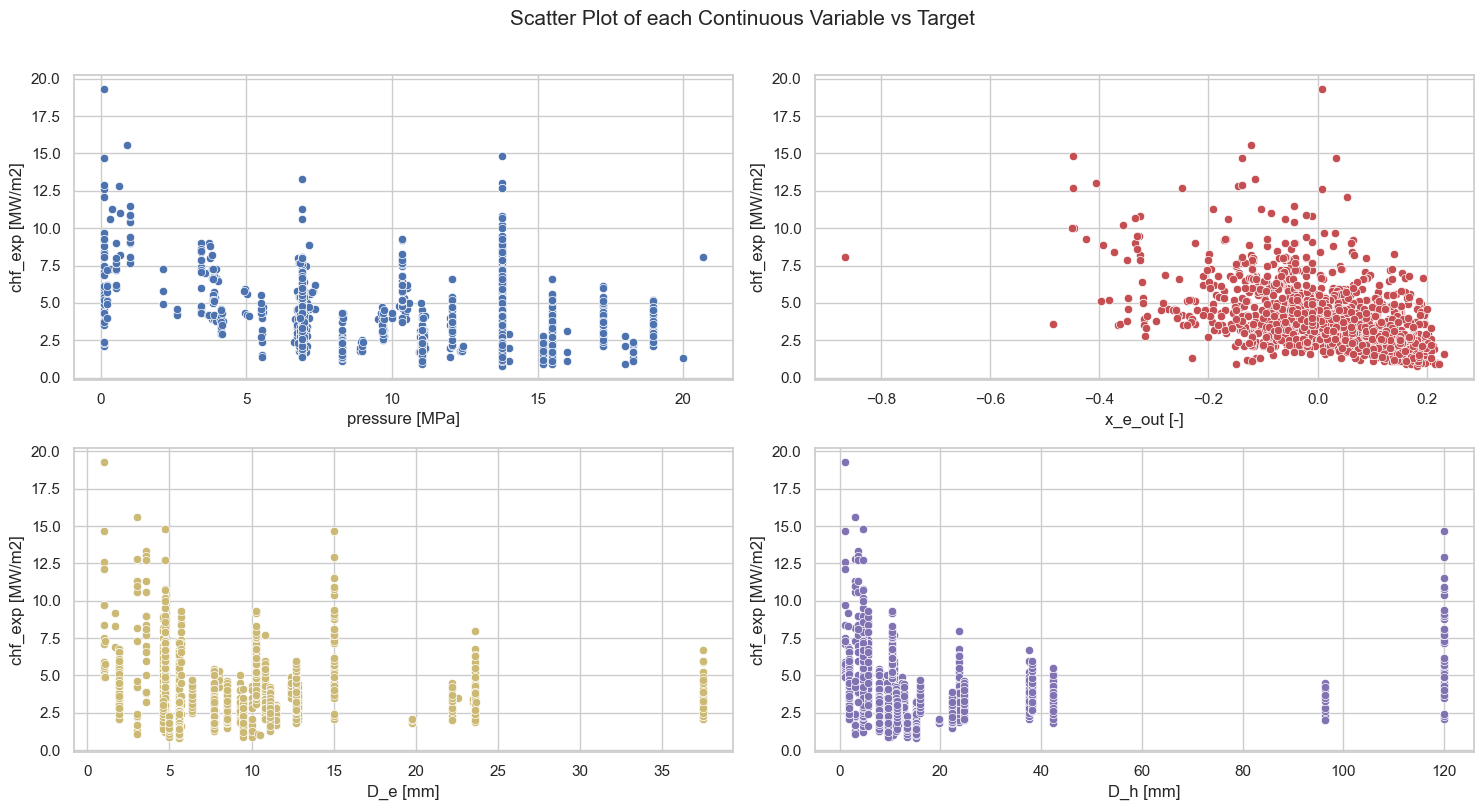

Number of All Scatter Plots = 10


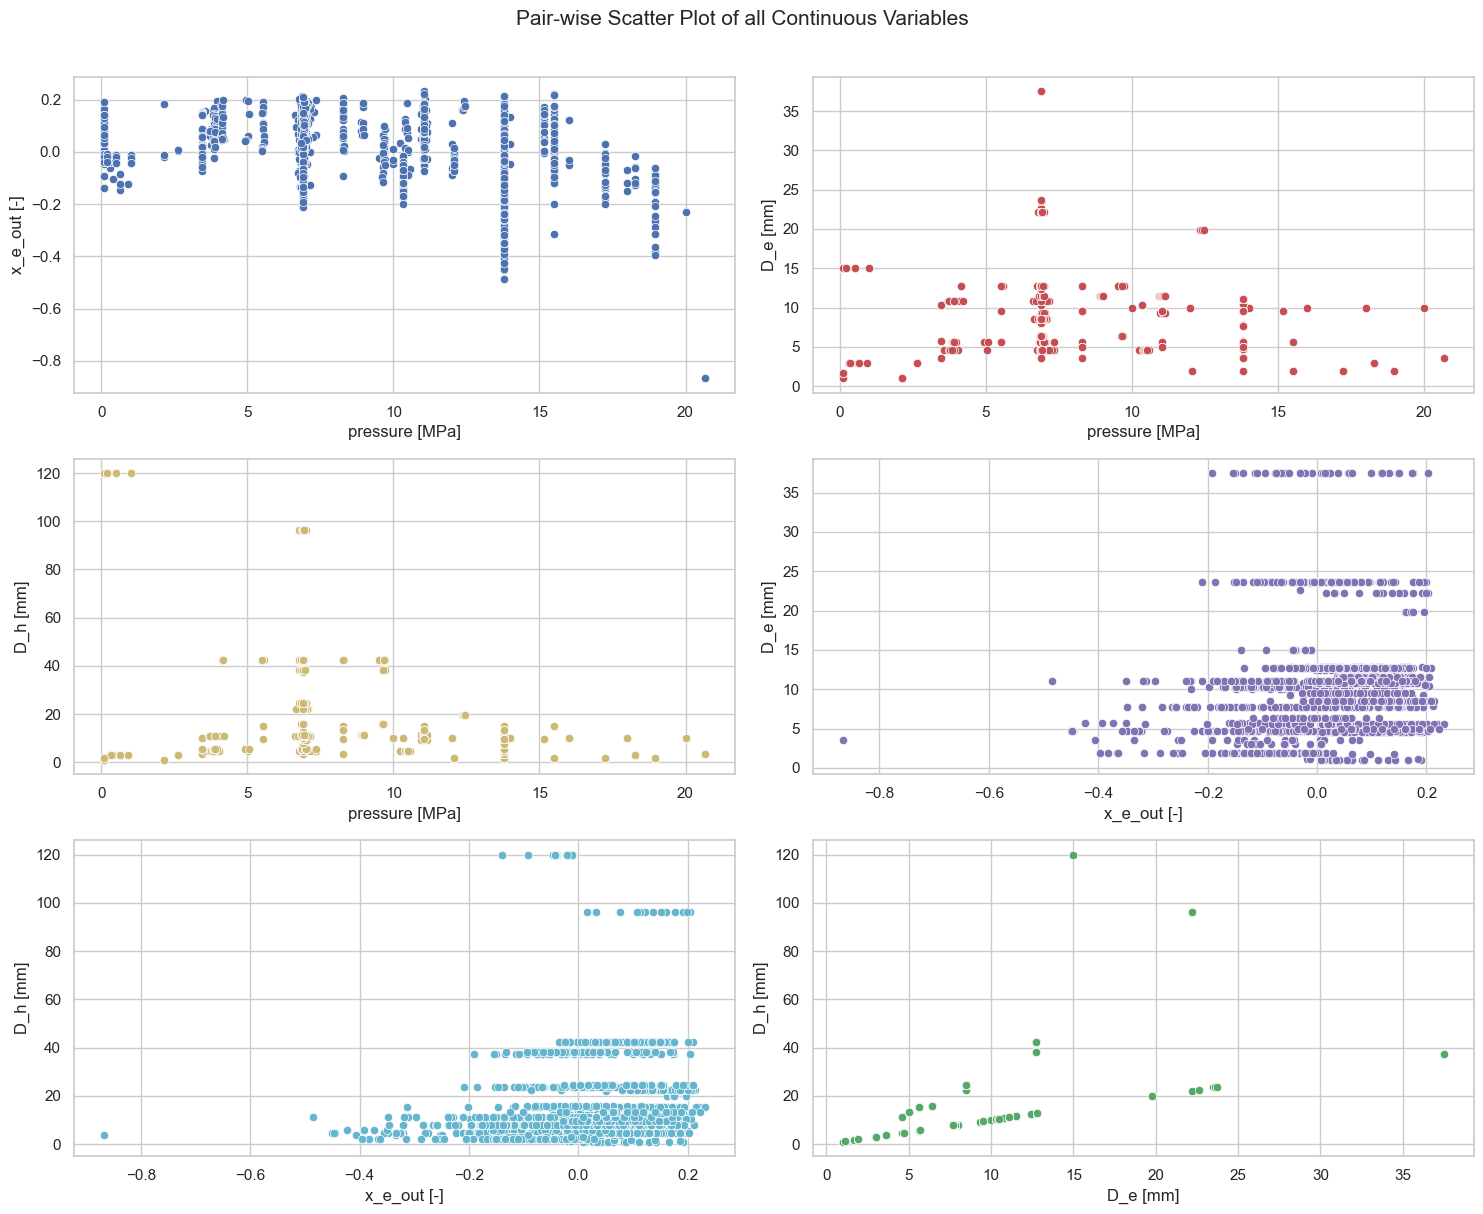

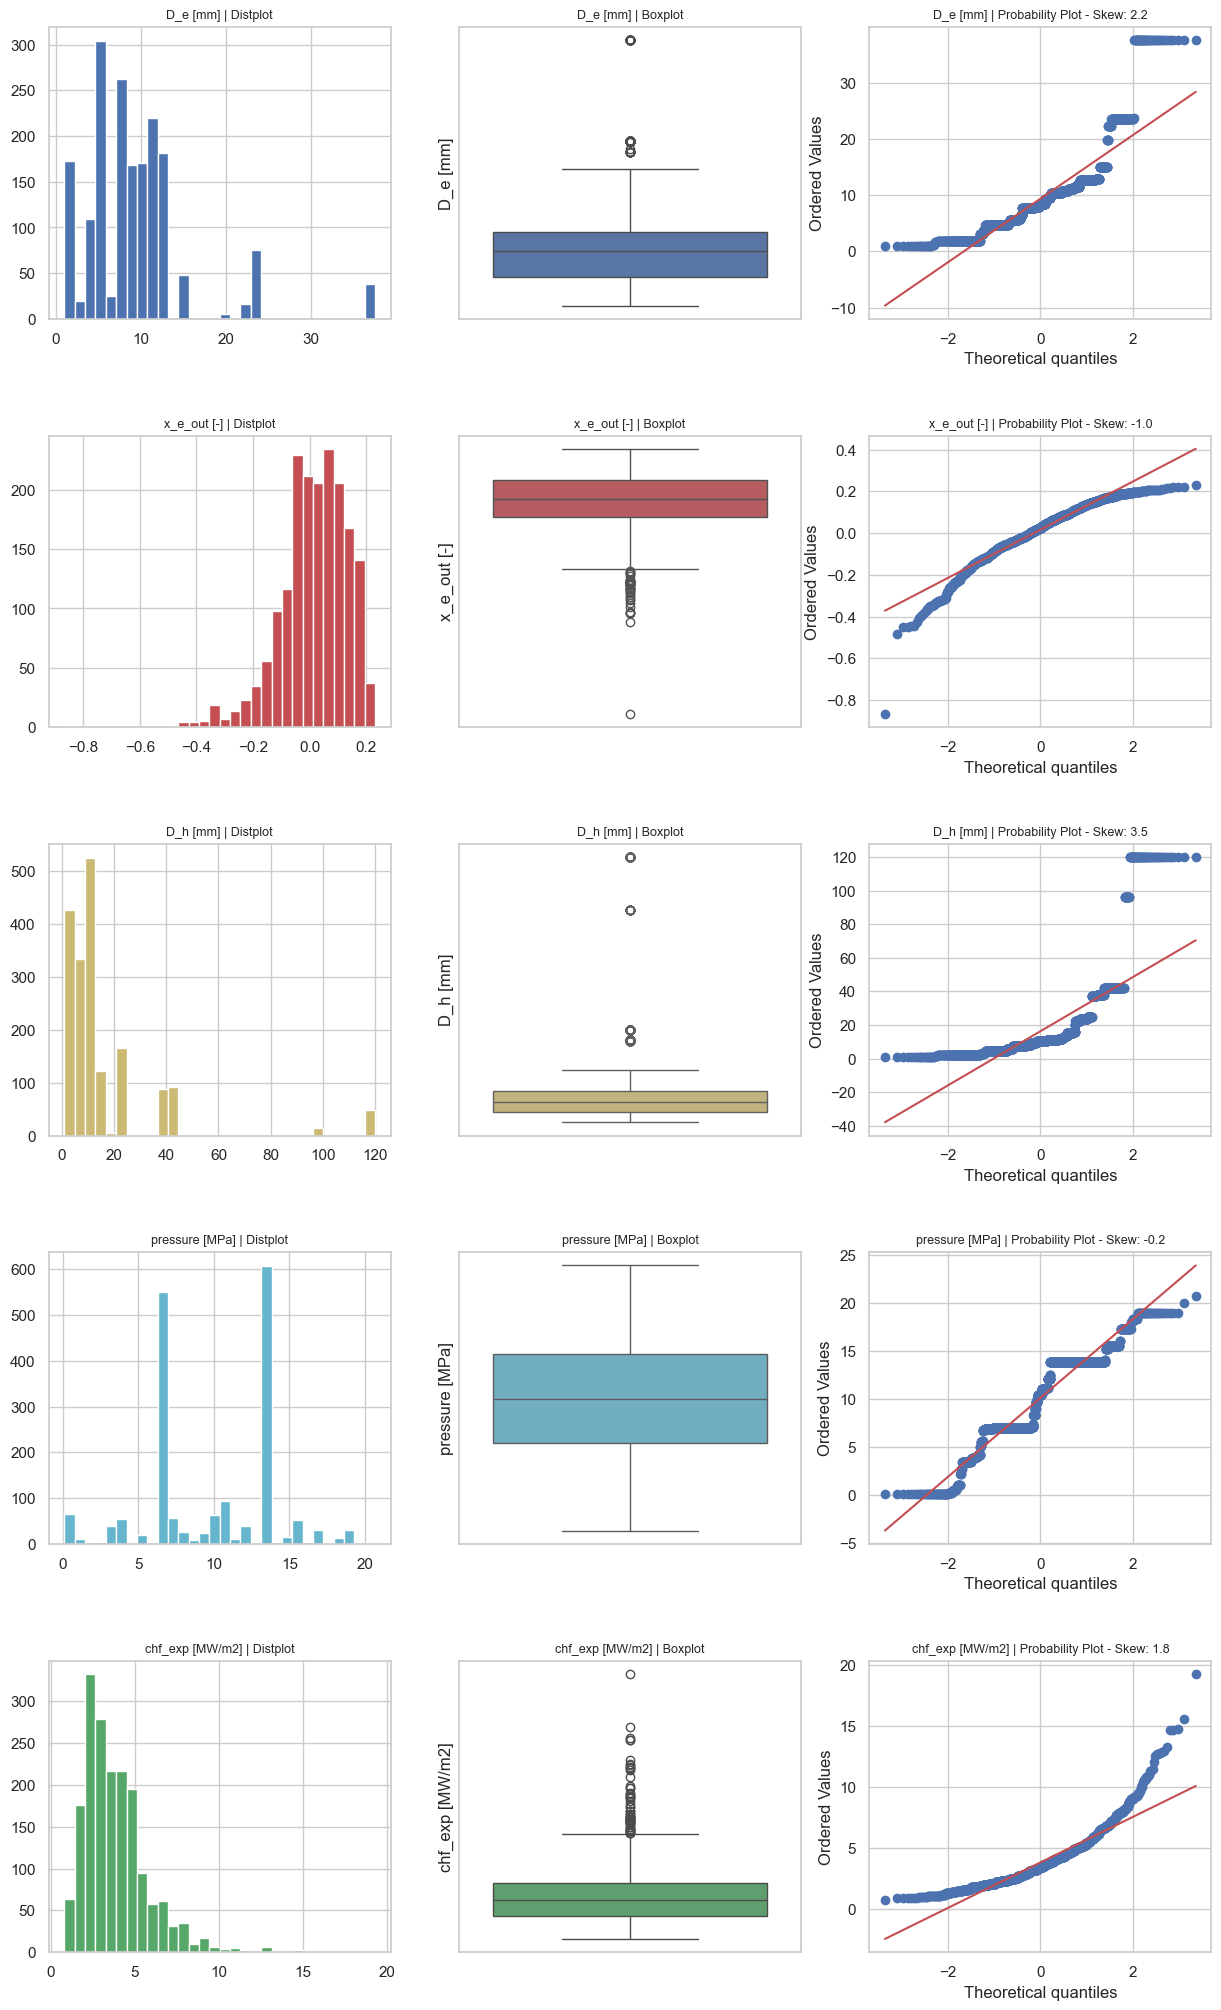

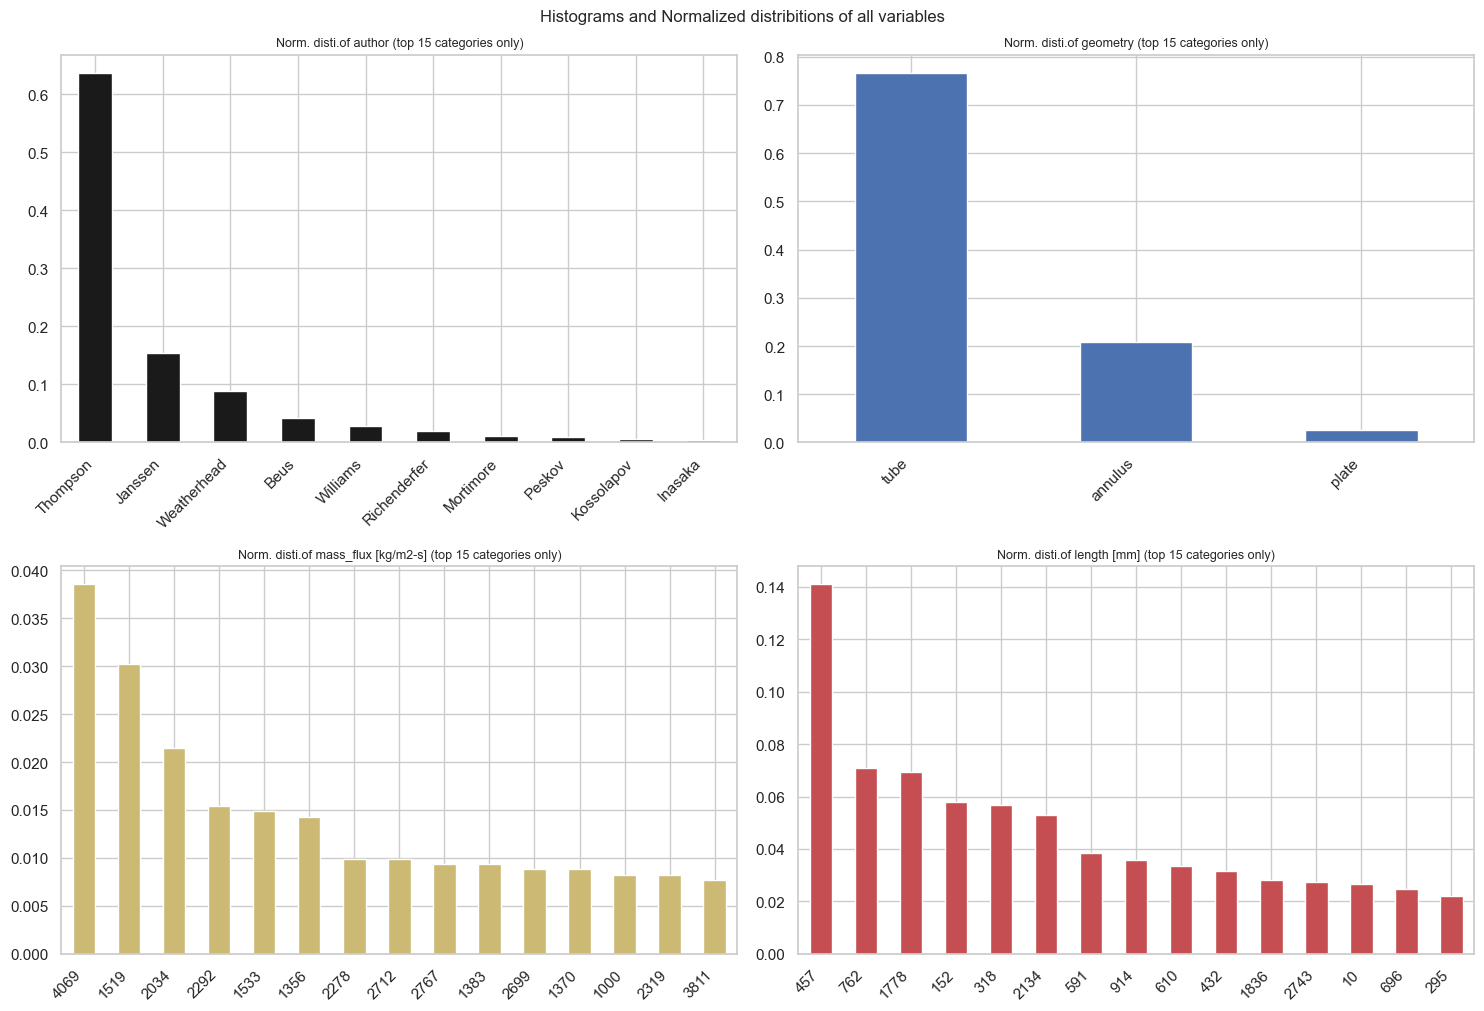

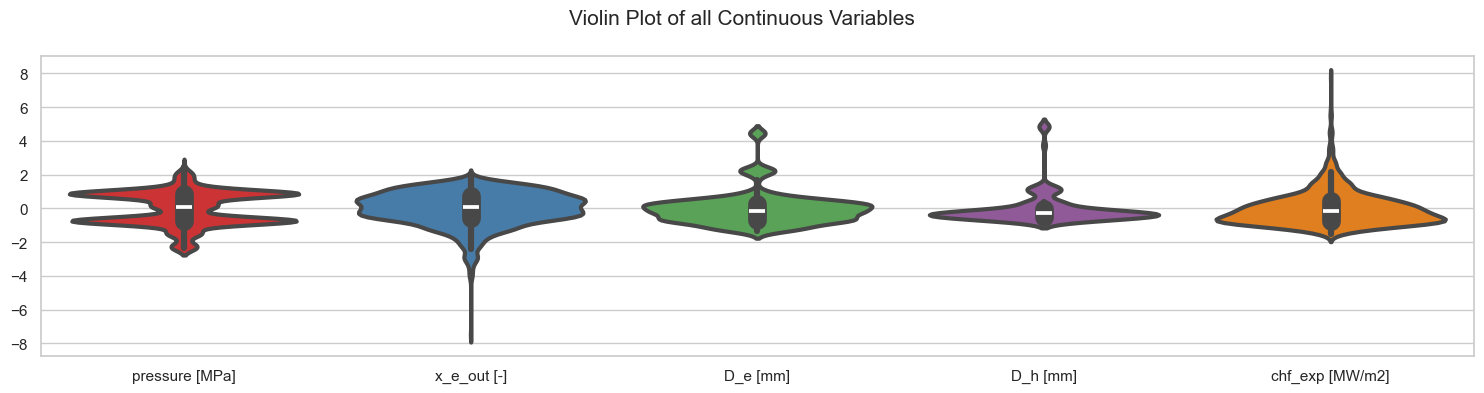

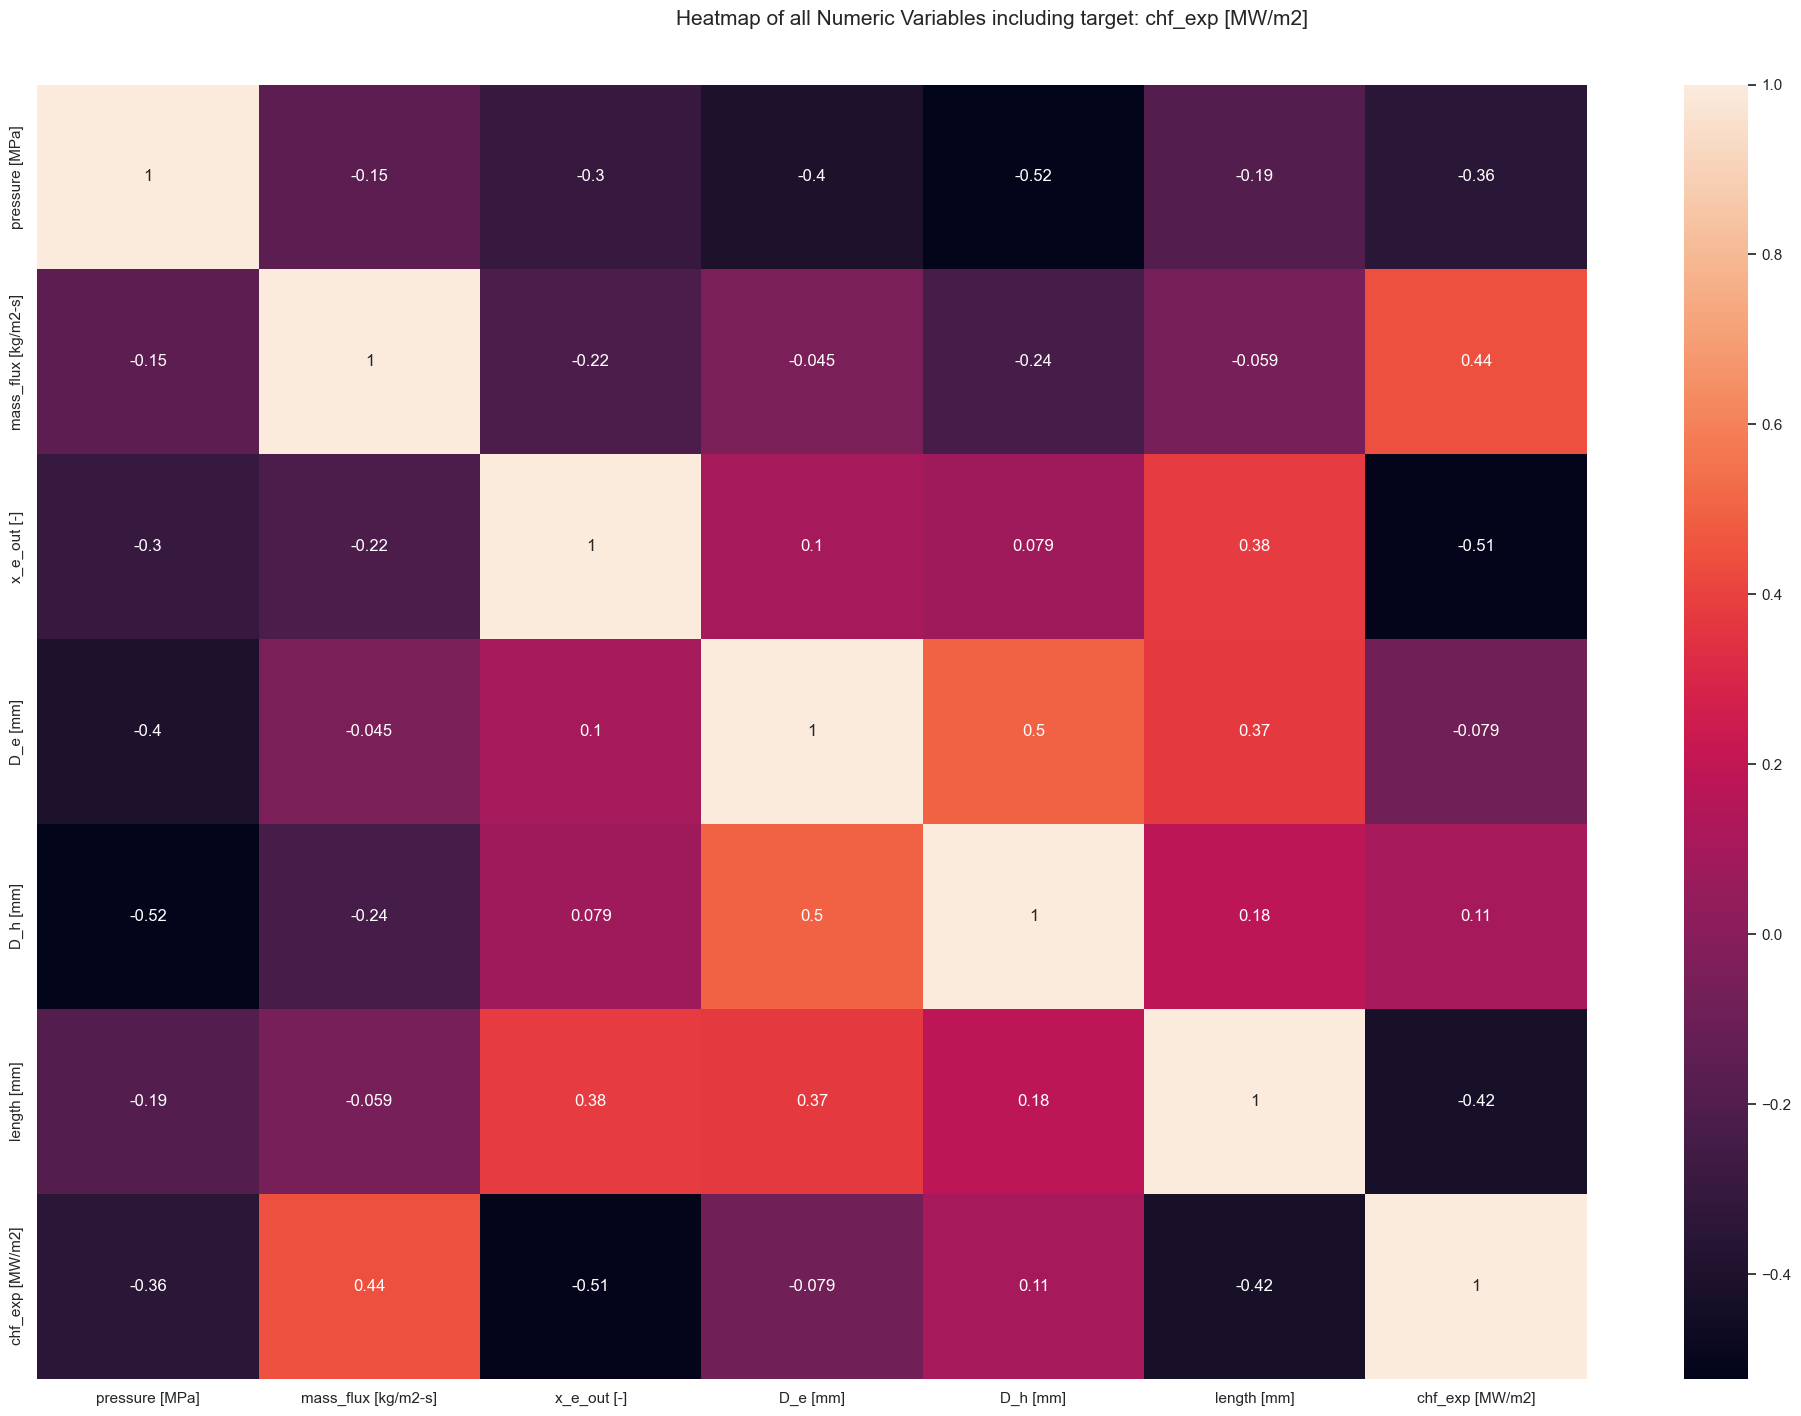

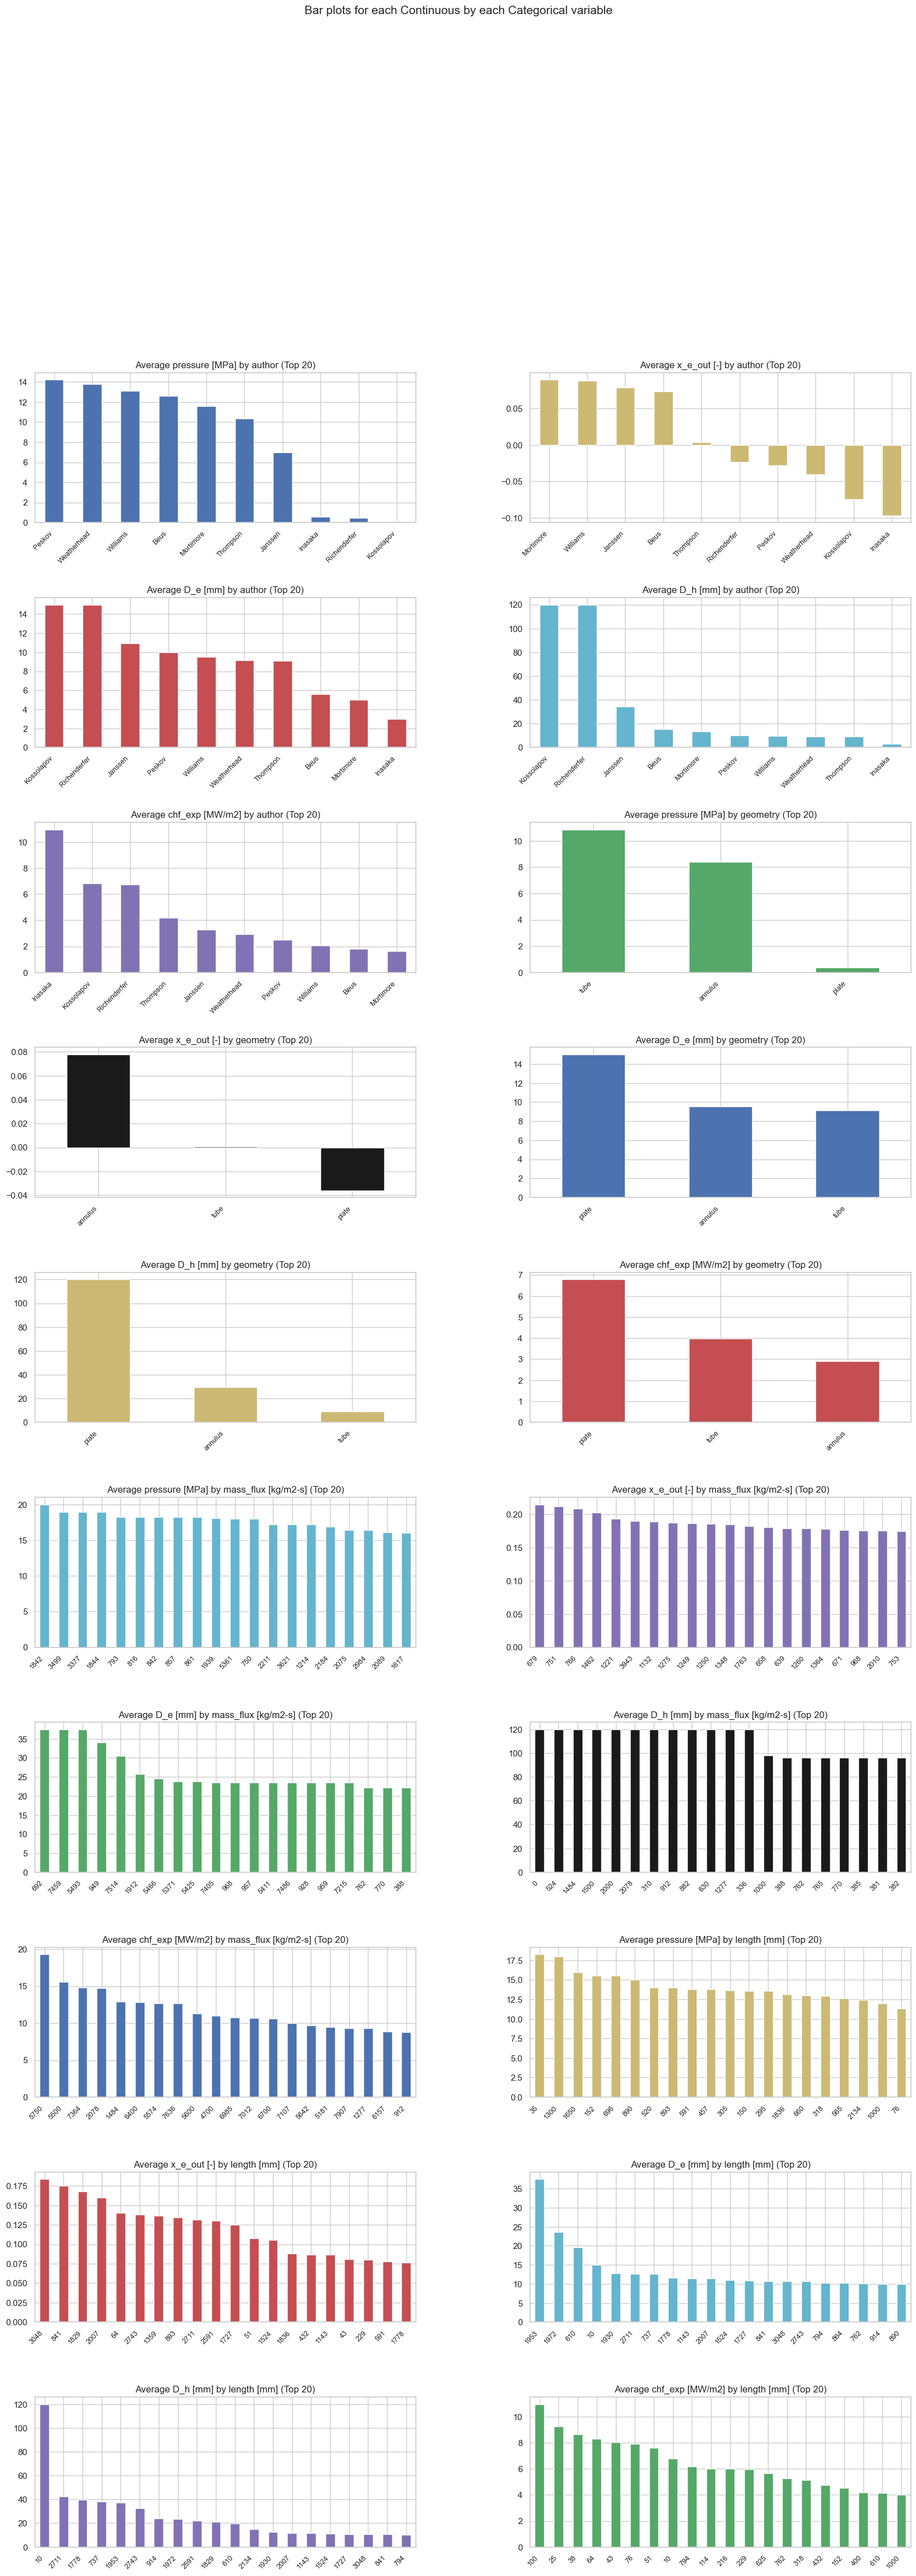

All Plots done
Time to run AutoViz = 16 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [25]:
# author conduct simulations/runs based on specific paramters, such as geomtery. So, don't drop it
# As this is a small dataset and to prevent overfitting, all the outliers are retained as of now
av = AutoViz_Class()
df = av.AutoViz('',depVar = 'chf_exp [MW/m2]', dfte = df)

**Data Visualization Insights**

Output is higher for plate geometries (small length and high D_h)

D_e and D_h impact pressure in a similar way

chf_exp dist. is slightly right-skewed

xeout negatively co-relates to output (-.5)

In [9]:
encode = ce.OrdinalEncoder()
df = encode.fit_transform(df)

In [15]:
# index = False ensures that the prevention of additional column rep. index labels
df.to_csv('FinalDataset.csv', index = False)